# **The Sparks Foundation - Data Science & Business Analytics Internship**
 

## **TASK 1 - Prediction using Supervised Machine Learning**


### **Author :- Parth Shrivastava** 

*In this task it is required to predict the percentage of a student on the basis of number of hours studied using the Linear Regression supervised machine learning algorithm.*

### Problem Distribution - 




*   Step 1 - Importing the necessary libraries
*   Step 2 - Read the dataset
*   Step 3 - Data analysis
*   Step 4 - Data visualization
*   Step 5 - Splitting the dataset
*   Step 6 - Training
*   Step 7 - Prediction
*   Step 8 - Evaluation

## Step 1 - Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2 - Read dataset

In [5]:
scores_df = pd.read_csv("Scores.txt")
scores_df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Step 3 - Analysis

In [6]:
# Display the shape of the dataset using shape attribute.
scores_df.shape

(25, 2)

In [7]:
# Display top 5 data using head function.
scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
# Display the meta data about the dataset using info function.
scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
# Display the statistical data related to the dataset using describe function.
scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [10]:
# Display the columns of the dataset using columns attribute.
scores_df.columns

Index(['Hours', 'Scores'], dtype='object')

Now check for NULL values if any

In [11]:
# Usingf isnull function
scores_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

As we can see there are no NULL values in the data set, hence there is no need of data preprocessing

## Step 4 - Visualization

<Figure size 2000x1500 with 0 Axes>

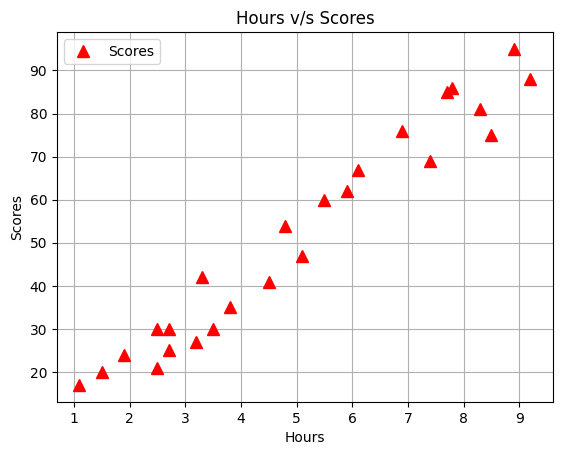

In [12]:
plt.figure(figsize = (20,15))
scores_df.plot(x = "Hours", y = "Scores", style="^", markersize = 9, color="red")
plt.grid()
plt.title("Hours v/s Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

**From the graph above, we can observe that there is a linear relationship between "hours studied" and "percentage score". So, we can use the linear regression supervised machine model on it to predict further values.**


<Axes: >

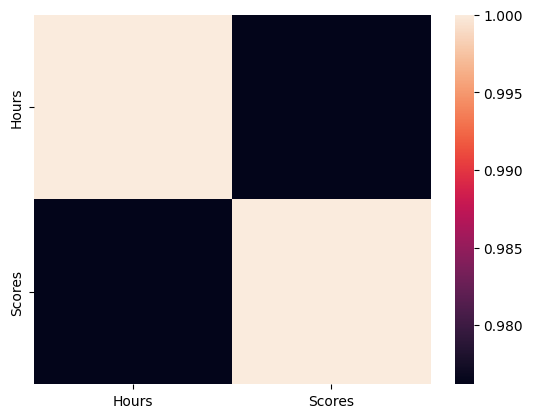

In [13]:
# Check for the correlation between the values using heatmap visualization.
sns.heatmap(scores_df.corr())

## Step 5 - Divide & Splitting 

In [56]:
X = scores_df.iloc[:, :-1].values
Y = scores_df.iloc[:, 1].values
X,Y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape 

((20, 1), (20,), (5, 1), (5,))

## Step 6 - Training

In [68]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(X_train, Y_train)

LinearRegression()

**Now visulaize the data to check for the best fit line**

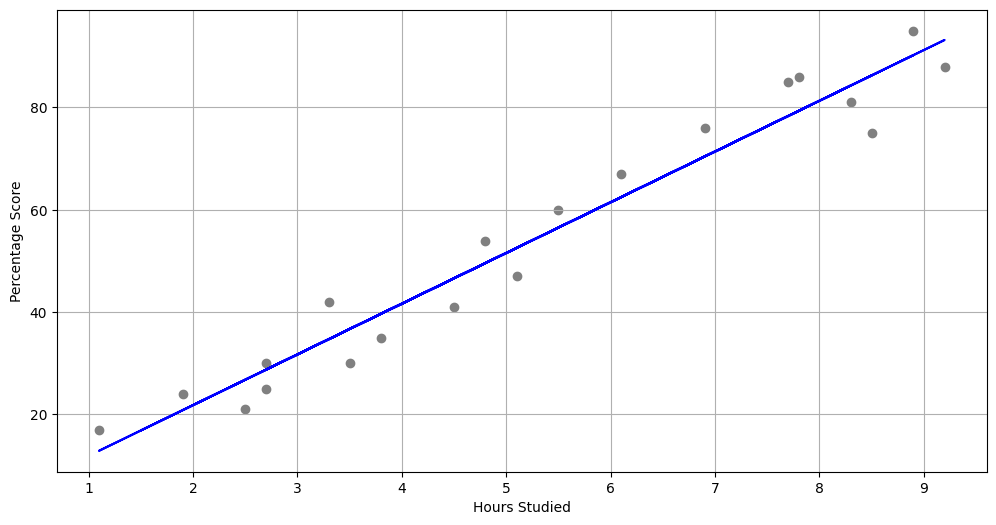

In [69]:
line = lg.coef_*X + lg.intercept_

# Plotting for the training data
plt.figure(figsize = (12,6))
plt.scatter(X_train, Y_train, color='gray')
plt.plot(X, line, color='blue');
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score') 
plt.grid()
plt.show()

## Step 7 - Prediction

In [70]:
X_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [71]:
y_pred = lg.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [72]:
new_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
new_df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [73]:
lg.score(X_test, Y_test)

0.9454906892105354

**Testing with own data**

In [74]:
hours = 9.25
sample_pred = lg.predict([[hours]])
print("The predicted score if a person studies for",hours,"hours is",sample_pred[0])

The predicted score if a person studies for 9.25 hours is 93.69173248737539


## Step 8 - Evaluation


In [75]:
from sklearn.metrics import mean_absolute_error, classification_report
print('Mean Absolute Error:', mean_absolute_error(Y_test, y_pred))


Mean Absolute Error: 4.183859899002982


print(classification_report(y_pred, Y_test))